In [10]:
from ortools.sat.python import cp_model

board_size = 8
model = cp_model.CpModel()
queens = [model.NewIntVar(0, board_size - 1, f'queen_row_{i}') for i in range(board_size)]

# Add constrains
model.AddAllDifferent(queens)
model.AddAllDifferent(queens[i] + i for i in range(board_size))
model.AddAllDifferent(queens[i] - i for i in range(board_size))

solver = cp_model.CpSolver()
solver.parameters.enumerate_all_solutions = True
solver.Solve(model)

4

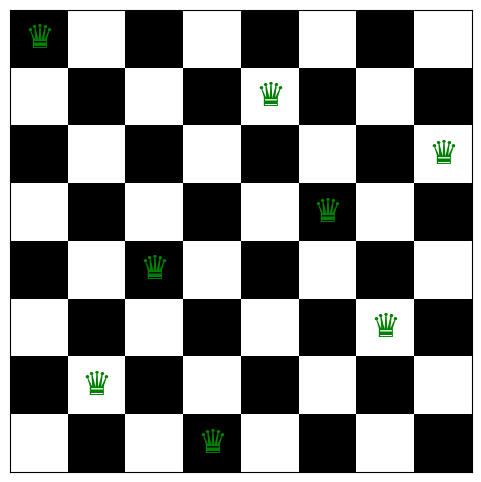

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Solution from the solver
solution = [solver.Value(queens[i]) for i in range(board_size)]

# Create the chessboard pattern
board = np.zeros((board_size, board_size))
board[1::2, ::2] = 1  # Alternate colors
board[::2, 1::2] = 1

# Plot the chessboard
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(board, cmap='gray', extent=(0, board_size, 0, board_size))

# Plot the queens
for row, col in enumerate(solution):
    ax.text(col + 0.5, board_size - row - 0.5, '♛', fontsize=24, ha='center', va='center', color='green')

# Remove axes and display the board
ax.set_xticks([])
ax.set_yticks([])
plt.show()
